# Tensorflow

Para que tú puedas generar un modelo de datos que resuelva este problema es de vital importancia que antes extraigas y representes la información utilizando un lenguaje de programación como Python y una biblioteca especializada en representación de datos y creación de modelos como TensorFlow. Una vez extraída la información y representada esta debe ser utilizada para entrenar un modelo de datos que para esto es de vital importancia conocer las operaciones y modos de ejecución de los cálculos dentro de TensorFlow.

En este tema vas a aprender a identificar el uso general de TensorFlow a través de la creación de tensores, sus operaciones básicas y modos de ejecución usando código en Python. Siendo la base para la construcción de modelos inteligentes con grandes volúmenes de datos.

## Tensores

Dentro de tu entorno laboral es muy posible que la forma más común de visualizar, transmitir y capturar información sea a través de hojas de cálculo, formularios, listas de cotejo, entre otros.


Normalmente, la información de las empresas, organizaciones, e instituciones suele estar representada por números y texto, como, por ejemplo, los datos de contacto de un cliente en específico, las órdenes de compra, los horarios de una persona, etcétera. Cada valor asociado con este tipo de registros dentro de una base de datos puede ser manejado por Python y alguna biblioteca de análisis y manipulación de datos como Pandas.


Sin embargo, muchas veces este tipo de representaciones de la información puede no ser suficiente cuando queremos almacenar la información que provenga de una imagen.



Hoy en día es muy probable que te encuentres con bases de datos que contengan información de millones de registros y por lo tanto el generar modelos de datos inteligentes sea una tarea que te consuma mucho tiempo de cómputo.  En los últimos años se ha empezado a hacer uso de las unidades de procesamiento gráfico de propósito general llamadas GPUs para acelerar el proceso de generación de modelos de datos. 


Por lo tanto, si queremos representar imágenes y construir modelos rápidamente, surge la necesidad de utilizar una representación de un objeto en Python que nos permita representar la información que hay dentro de una imagen y además que pueda aprovechar las opciones de aceleración de los GPUs para que podamos generar modelos de datos más rápido. 


Desde luego en Python existen algunas bibliotecas que nos podrían ayudar a construir modelo de datos con imágenes. Sin embargo, entre todas las bibliotecas disponibles, TensorFlow busca facilitar aún más este proceso y además no solamente integrar el uso de GPUs sino también de una nueva tecnología llamada unidad de procesamiento tensorial TPU.


Sabías que TensorFlow es utilizado en diversas empresas reconocidas para aplicaciones relacionadas con modelos de datos inteligentes. Te invitamos a visitar el siguiente enlace y que conozcas algunos casos de éxito y como es utilizado TensorFlow:


https://www.tensorflow.org/about/case-studies


Para que tu puedas utilizar esta poderosa plataforma llamada TensorFlow debes comprender primeramente el objeto con el que TensorFlow maneja la información internamente llamado Tensor.



Considera la siguiente información proveniente de una aerolínea que incluye tarifas de vuelos, posición de los aviones, y distancia en kilómetros por destino:

Tabla 1
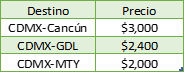

Tabla 2
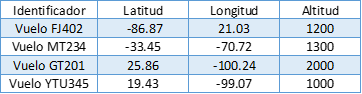

Tabla 3
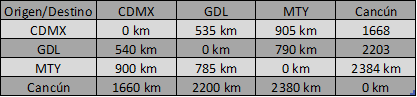

En la Tabla 1 podemos poner el costo unitario de cada vuelo en un tensor, es decir, 3000, 2400 y 2000 los cuales llamaremos **escalares** puesto que es solo un dato independiente por tensor.

En la Tabla 2 donde por identificador tiene asociado tres valores que marcan su posición actual la latitud, longitud y la altitud, este tipo de objeto que almacena más de un valor numérico le llamaremos **vector**. 

Finalmente, si quisieras incluso almacenar en un tensor datos distribuidos en celdas marcadas por diferentes filas y columnas como las distancias en kilómetros entre los diferentes destinos dentro de la Tabla 3, se podría hacer sin ningún problema y llamaríamos a este conjunto de valores **matrices**.

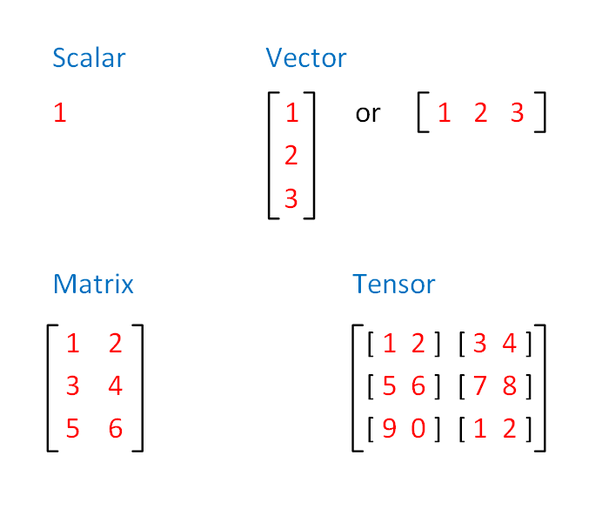

Por lo tanto, un tensor es un objeto donde puedes almacenar escalares, vectores, o matrices de dato, pero a la vez también pueden ser útiles para almacenar mucha más información. Ahora bien, es tiempo de que nos pongamos a trabajar y comiences a utilizar Python con TensorFlow.

In [1]:
#Importar la bibliotecas de Python
import tensorflow as tf
import numpy as np


Cada tensor tiene un valor inicial que puede ser un escalar (1342) que represente, por ejemplo, el número de transacciones bancarias de una PyME

In [2]:
escalar = tf.Variable(1342, shape = (), dtype = tf.int16)
print(escalar)



<tf.Variable 'Variable:0' shape=() dtype=int16, numpy=1342>


Un vector fila o columna ([12, 21,21,21] o ([[12], [21], [21], [12]]) que representa los días de 4 meses seguidos de cuando se hicieron pagos a algún tipo de servicio o tarjeta de crédito

In [3]:
vectorFila = tf.Variable([12, 21, 21, 21], shape = (4,), dtype = tf.int32)
print(vectorFila)


<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([12, 21, 21, 21])>


In [4]:
vectorCol = tf.Variable([[12], [21], [21], [12]], shape = (4,1), dtype = tf.int32)
print(vectorCol)


<tf.Variable 'Variable:0' shape=(4, 1) dtype=int32, numpy=
array([[12],
       [21],
       [21],
       [12]])>


Una matriz ([[32,43,23], [23,44,53], [60,54,81], [56,73,24]]) que represente el número de cambios y devoluciones en cuatro tiendas diferentes durante un trimestre

In [5]:
matriz = tf.Variable([[32,43,23], [23,44,53], [60,54,81], [56,73,24]], shape = (4,3), dtype = tf.int32)
print(matriz)


<tf.Variable 'Variable:0' shape=(4, 3) dtype=int32, numpy=
array([[32, 43, 23],
       [23, 44, 53],
       [60, 54, 81],
       [56, 73, 24]])>


O una cadena de texto que represente información descriptiva y que no puede expresarse de forma numérica. 

In [8]:
texto = tf.Variable("Este registro fue generado con la información de los clientes", shape = (), dtype= tf.string)
print(texto)

<tf.Variable 'Variable:0' shape=() dtype=string, numpy=b'Este registro fue generado con la informaci\xc3\xb3n de los clientes'>


De igual forma cada tensor tiene asociado una forma (shape) que es la que establece la cantidad de datos y como se organizan dentro del tensor.

Para la celda 2,definimos ```shape = ()``` debido a que solamente almacenamos un solo dato como el número de transacciones de una Pyme o información descriptiva de un registro.

En el caso de los vectores tenemos dos alternativas, una puede ser un vector general o fila y solo debemos especificar el primer valor indicando el número de elementos, como en la celda 3 especificamos como ```shape = (4,)``` donde el primer número dentro del paréntesis representa la cantidad de valores que almacenaremos dentro del tensor.

Es importante reconocer que tenemos vectores columna que a diferencia de los vectores fila si los vemos de forma gráfica están en una posición vertical. Para utilizar los vectores columna debes especificar su forma incluyendo el número de filas y especificar que al menos se tendrá una columna. Por ejemplo, la celda 4 especifica que el vector columna tendrá 4 filas y una columna ```shape = (4,1)```.

La matriz al igual que el vector columna necesita especificar en su forma tanto el número de fila como el de columnas el cual puede ser diferente de 1. Por ejemplo, la matriz de la línea 4 representando el número de cambios y devoluciones en cuatro tiendas diferentes durante un trimestre almacena 4 filas de 3 columnas ```shape = (4,3)``` donde cada lista dentro de la lista principal del valor inicial representa una fila de la matriz. 




Otro elemento importante de los tensores es el tipo de dato que van a almacenar que se especifica manualmente en dtype, en nuestro código anterior tenemos:   ```tf.int16```, ```tf.int32```, ```tf.string```. El tipo de dato nos ayudará a especificar dentro de TensorFlow la cantidad de bits que representará nuestro número. El tipo de dato tienen una gran relevancia porque te ayudará a ahorrar espacio en memoria, por ejemplo, si quieres guardar días del mes bastaría utilizar un ```tf.int8```, sin embargo, si vas a guardar cantidades más grandes como el número de transacciones anuales dentro de una empresa por mes podrías utilizar un ```tf.int32```.  En ocasiones el número de bits se va a colocar explícitamente seguido del tipo de dato como en ```tf.int16``` y ```tf.int32``` donde mientras mayor sea el número podemos representar números con más grandes. Las últimas líneas de código del bloque son para imprimir la información dentro de los tensores.

Podemos observar primeramente información interna de TensorFlow sobre que los tensores que creamos son del tipo “Variable”, también podemos ver los atributos de forma (shape), y el tipo de dato (dtype).

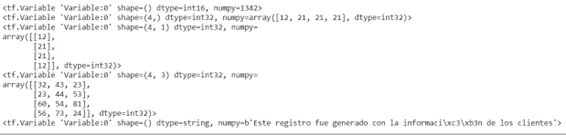


In [ ]:
# Prueba acceder a cada uno de sus atributos




Finalmente, TensorFlow en ocasiones se apoya del uso de numpy una biblioteca para el manejo de vectores, matrices y sus operaciones. Es por esa razón que al imprimir nuestros tensores al final del código anterior existe un atributo llamado “numpy” que especifica la representación de los datos que ingresamos utilizando esta biblioteca.

Si ya dominas los atributos de los tensores también puedes omitir la forma y el tipo de dato y dejar que sea TensorFlow el que tome estas decisiones como sucede en el siguiente código:

In [9]:
escalarFlotante = tf.Variable(23.43)
print(escalarFlotante)



<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=23.43>


In [10]:
vectorFila2 = tf.Variable([3.4, 4.2, 5])
print(vectorFila2)



<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([3.4, 4.2, 5. ], dtype=float32)>


Puedes notar que introdujimos otro tipo de dato ```tf.float32``` así como también es importante que si dentro de un escalar, vector o matriz hay un dato con punto decimal este será un tensor de tipo ```tf.float32```.

In [11]:
matriz2 = tf.Variable([[2,34,5,3],[43,23,532,23]])
print(matriz2)

<tf.Variable 'Variable:0' shape=(2, 4) dtype=int32, numpy=
array([[  2,  34,   5,   3],
       [ 43,  23, 532,  23]])>


In [12]:
#Error diferentes tipos de datos
vectorFila = tf.Variable([12, 21, 21.5, 21], shape = (4,), dtype = tf.int32)

TypeError: Cannot convert [12, 21, 21.5, 21] to EagerTensor of dtype int32

In [13]:
tensor1 = tf.Variable([125.32, 132.24, 128.45, 124.45, 133.43, 243] , shape = (6,), dtype = tf.float32)
tensor1




<tf.Variable 'Variable:0' shape=(6,) dtype=float32, numpy=array([125.32, 132.24, 128.45, 124.45, 133.43, 243.  ], dtype=float32)>

In [14]:
tensor1 = tf.Variable([[125.32], [132.24], [128.45], [124.45], [133.43], [243]] , shape = (6,1), dtype = tf.float32)
tensor1

<tf.Variable 'Variable:0' shape=(6, 1) dtype=float32, numpy=
array([[125.32],
       [132.24],
       [128.45],
       [124.45],
       [133.43],
       [243.  ]], dtype=float32)>

In [15]:
volumenes = tf.Variable([[234, 342, 433, 423, 200, 432], [432, 123, 153, 186, 95, 32], [23, 53, 195, 176, 153, 87]])
print(volumenes)

<tf.Variable 'Variable:0' shape=(3, 6) dtype=int32, numpy=
array([[234, 342, 433, 423, 200, 432],
       [432, 123, 153, 186,  95,  32],
       [ 23,  53, 195, 176, 153,  87]])>


## Tipos de Tensores

Así como hemos visto los atributos internos de un tensor, también existen varios tipos de ellos.

Los principales son:

* Variable: el valor asignado al tensor puede cambiar en cualquier momento, no así su forma o tipo de dato. Son utilizados normalmente para almacenar resultados de operaciones o datos que cambiarán en el tiempo. Por ejemplo, los 5 mejores tiempos de un corredor que son datos que podrían actualizarse en un futuro pueden almacenarse en un tensor de tipo variable:


In [29]:
variable = tf.Variable([12.11, 12.23, 12.44, 12.51, 12.54])
print(variable)


<tf.Variable 'Variable:0' shape=(5,) dtype=float32, numpy=array([12.11, 12.23, 12.44, 12.51, 12.54], dtype=float32)>


* Constant: el valor o los valores asignados al tensor no pueden ser modificados una vez creado. Pueden utilizarse como elementos fijos para calcular valores en operaciones en el proceso de evaluación. Por ejemplo, el reporte de ventas de 3 productos en un cuatrimestre previo al actual, ya no se actualizará por lo que puede permanecer constante una vez ingresado a un tensor:

In [30]:
constante = tf.constant([[124,100,154, 100], [30, 44, 23, 50], [55, 98, 100, 87]])
print(constante)


tf.Tensor(
[[124 100 154 100]
 [ 30  44  23  50]
 [ 55  98 100  87]], shape=(3, 4), dtype=int32)


También, existen otro tipo de tensores menos comunes para otros propósitos específicos:

* SparseTensor:  el valor o los valores asignados al tensor no pueden ser modificados una vez creado. Son tensores que se utilizan para representar matrices dispersas que son aquellas que contienen valores numéricos pero la mayoría son ceros solo una pequeña cantidad de valores son diferentes a cero. Ejemplo:



In [32]:
sparse = tf.sparse.SparseTensor(indices=[[1, 1], [2, 3]], values=[20, 44], dense_shape=[3, 4])
print(sparse)

SparseTensor(indices=tf.Tensor(
[[1 1]
 [2 3]], shape=(2, 2), dtype=int64), values=tf.Tensor([20 44], shape=(2,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


La matriz asociada al SparseTensor es de la siguiente forma:

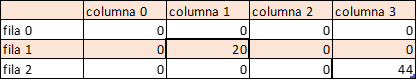

Donde el atributo indices especifica el número de fila y columna empezando desde la fila 0 y columna 0 de las posiciones de la matriz que tendrán un valor diferente de 0.  Es por esa razón que el valor 20 se encuentra en la celda que coincide con la fila 1 y la columna 1. Y para el caso del 44 está en la celda de intersección de la fila 2 con la columna 3.



•	Placeholder: son tensores que pueden utilizarse para alimentar datos a modelos y no necesariamente deben tener un valor inicial fijo, pero no pueden ser evaluados para realizar operaciones. De igual forma es necesario utilizar sesiones para utilizarlos y no son compatibles con el concepto “eager execution”  que nos permite evaluar el tensor de forma inmediata. Ejemplo: Tensorflow 1

```
tf.compat.v1.disable_eager_execution()
x = tf.compat.v1.placeholder(tf.float32, shape=(1024, 1024))
print(x)
```

Salida:

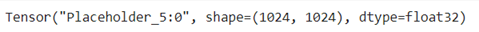


## Operaciones básicas con tensores

En muchas ocasiones dentro de una organización se busca constantemente transformar todos esos datos en información que nos permita sacarles provecho, por ejemplo, en nuestro caso en particular utilizarlos para la creación de modelos de datos. Estos modelos pueden ayudarnos al proceso de tomas de decisiones en ambientes sociales, económicos, industriales, etcétera.

Pero, recuerda que para llegar a los modelos de datos es de vital importancia que conozcas las operaciones y la forma de evaluación de los procesos dentro de TensorFlow.

Además de que los tensores te ayuden a almacenar información a la vez pueden ser generados por el resultado de una operación. Es decir, los tensores te ayudarán a representar cálculos parciales de operaciones definidas que producirán un valor. Esto es muy importante porque TensorFlow contiene una serie de operaciones que trabajarán con tensores y producirán tensores

Ejemplo:

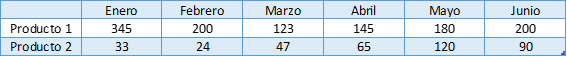

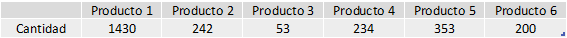

El código representa la suma semestral por mes de las ventas de dos productos diferentes para sacar el total de ventas mensuales.

La operación ```tf.add``` toma dos vectores del mismo tamaño y forma sumando elemento a elemento lo cual te puede servir para sacar el total de eventos en un período de tiempo. De igual forma el resultado de dicha operación es colocado en un tensor que tiene una forma y un tipo de dato. 


In [33]:
print(tf.add([345, 200, 123, 145, 180, 200], [33, 24, 47, 65, 120, 90]))



tf.Tensor([378 224 170 210 300 290], shape=(6,), dtype=int32)


El código representa la corrección del inventario por 34 unidades de 6 productos.  

El segundo resultado que obtendrás será por una operación de resta entre un vector y un escalar en este caso el escalar se le va a restar a cada elemento del vector lo cual te puede servir para hacer ajustes en todos los elementos del vector como la corrección de inventarios. 

In [34]:
print(tf.subtract([1430, 242, 53, 234, 353,200], 34))

tf.Tensor([1396  208   19  200  319  166], shape=(6,), dtype=int32)


De igual forma existen diversos tipos de operaciones que pueden aprovechar el uso de los GPUs y TPUs dentro de TensorFlow como, por ejemplo:

* tf.matmul: realiza una multiplicación de matrices
* tf.reduce_max: obtiene el máximo valor entre los elementos numéricos que conforman un tensor.
* tf.reduce_mean: obtiene el valor promedio entre los elementos numéricos que conforman un tensor.
* tf.linalg.inv: calcula la inversa de una matriz
* tf.linalg.matrix_transpose: funciona para transponer una matriz

Ahora intenta


In [22]:
matriz4x3 = tf.constant([3, 4, 3, 4, 5, 2, 6, 6, 3, 2, 1, 3], shape=[4, 3])
print(matriz4x3)
matriz3x2 = tf.constant([1, 2, 2, 1, 1, 2], shape=[3, 2])
print(matriz3x2)
print(tf.matmul(matriz4x3,matriz3x2))
ventasxvend = tf.constant([13, 24, 23, 28, 34, 45, 20, 14, 35, 50, 35])
print(tf.reduce_max(ventasxvend))
print(tf.reduce_mean(ventasxvend))

tf.Tensor(
[[3 4 3]
 [4 5 2]
 [6 6 3]
 [2 1 3]], shape=(4, 3), dtype=int32)
tf.Tensor(
[[1 2]
 [2 1]
 [1 2]], shape=(3, 2), dtype=int32)
tf.Tensor(
[[14 16]
 [16 17]
 [21 24]
 [ 7 11]], shape=(4, 2), dtype=int32)
tf.Tensor(50, shape=(), dtype=int32)
tf.Tensor(29, shape=(), dtype=int32)


Ya habrás identificado que la línea 1 y 3  de la celda anterior contienen la declaración de dos tensores constantes. Pareciera que ambos tensores tienen como valor inicial un vector, sin embargo, es importante que notes que la forma shape nos puede ayudar a acomodar un vector como matriz. Esto será posible, siempre y cuando el número de elementos del vector se igual al número total de elementos dentro de la matriz de acuerdo con sus dimensiones. Por ejemplo, la primera matriz es de 4 filas por 3 columnas lo que nos da un total de 12 elementos dentro de la matriz. 

En el caso de la segunda matriz la forma indica que son 3 filas por 2 columnas lo que nos da un total de 6 elementos. Es muy importante que tengas presente como se especifica la forma de los tensores dado que te será de mucha utilidad para especificar el alto y ancho del número de datos que contiene una imagen. En otras palabras, utilizaremos matrices dentro de tensores para representar las imágenes en TensorFlow. 

La línea 5 de la celda anterior realiza una multiplicación de matrices con la matriz de 4 x 3 y la matriz de 3 x 2. Si te das cuenta estamos consumiendo tensores ya declarados a diferencia de nuestro bloque de código anterior donde colocamos directamente los valores con los que se realizarían las operaciones. Ambas maneras son totalmente válidas para realizar operaciones en TensorFlow. Como ya sabrás el resultado de dicha operación será un tensor.

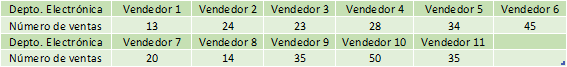

De igual forma puedes utilizar otras operaciones complementarias para conocer información relevante de los datos que ingresas. Por ejemplo, en la línea 6 declaramos un tensor que tiene las ventas mensuales por vendedor de una tienda departamental en el departamento de electrónica.

Si quisieras saber cuál es el máximo número de ventas o el promedio de ventas mensual por empleado puedes utilizar operaciones como tf.reduce_max  y tf.reduce_mean  en las líneas 7 y 8 respectivamente.


In [35]:
from tensorflow import keras # Usa backend de KEras para obtener el valor del tensor

In [36]:
value = tf.keras.backend.eval(tf.reduce_max(ventasxvend))
print(value)

50


Esta funcion intenta evaluar parcialmete el tenson y regresa su valor como un arreglo de numpy

In [37]:
tf.get_static_value(tf.reduce_mean(ventasxvend))

29

## Tipos de ejecución

Hay cambios significativos entre tensorflow 1 y tensorflow 2, de los principales cambios es lo relativo a "eager execution".

Anteriormente se creaba un grafo computacional, siendo un tanto ineficiente, ahora Tensorflow 2 no requiere un grafo.

Suponemos que tenemos 3 tensores, que representan números constantes:



In [38]:
one = tf.constant([12])
two = tf.constant([3])
three = tf.constant([2])

El objetivo es multiplicar los primeros 2 tensores y restar el producto de la multiplicación con el ultimo tensor.


In [39]:
multres = tf.math.multiply(one, two)

Ahora hacemos la diferencia

In [40]:
subres = multres - three

¿Como pensamos que se ejecuta el código anterior? - De forma secuencial.

No es así como lo hace Tensorflow, en la configuración anterior por default de tensorflow 2.X.


### Grafos computacionales

LA forma de hacerse era con un grafo computacionalbasado en la entrada. Visualmente se vería de la siguiente forma:

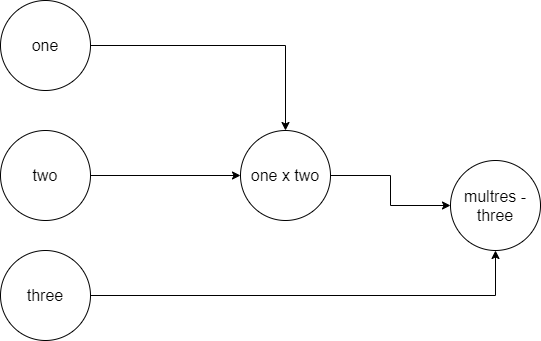

Es un esqueleto de lo que requieres que suceda. 
Para aquellos que han usado tensorflow reconoceran las instanciaciones de Tensorflow debe empezar con ```tf.Session``` para inicializar el grafo antes de cualquier cosa.

Los beneficios eran declarar los pasos de lo que necesitamos a priori, que sirve cuando un modelo se tiene que reconstruir, por ejemplo en otra maquina.

Por otro lado es increiblemente frustrante ciando estas haciendo tuneo de hyperparametros en un modelo de ml: literalmente tienes que compilar el modelo completo una y otra vez 

"Eager execution" es un ambiente de programación que evalúa las operaciones de forma inmediata sin contruir el grafo computacional: la operación regresa los valores concretos en lugar de construir un grafo para ser ejecutado despues.

In [58]:
# Prueba si tu version de tensorflow tiene habilitado la ejecucion eager
import tensorflow as tf
tf.executing_eagerly()

False

In [57]:
tf.compat.v1.disable_eager_execution()

In [44]:
def funcion_ejemplo_python(num_ventas, precios):
  total = tf.matmul(num_ventas, precios)
  comision = tf.multiply(tf.cast(total,tf.float32), .07)
  return comision
funcion_grafo = tf.function(funcion_ejemplo_python)
n_ventas = tf.constant([3, 5, 9],shape = [1,3])
preciosxprod = tf.constant([1800, 759, 599], shape = [3,1])
print(funcion_grafo(n_ventas,preciosxprod))


Tensor("PartitionedCall:0", shape=(1, 1), dtype=float32)


In [45]:
variable = tf.Variable([12.11, 12.23, 12.44, 12.51, 12.54])
print(variable)

<tf.Variable 'Variable:0' shape=(5,) dtype=float32>


In [46]:
constante = tf.constant([[124,100,154, 100], [30, 44, 23, 50], [55, 98, 100, 87]])
print(constante)

Tensor("Const_2:0", shape=(3, 4), dtype=int32)


In [47]:
tf.compat.v1.disable_eager_execution()
x = tf.compat.v1.placeholder(tf.float32, shape=(1024, 1024))
print(x)
#y = tf.matmul(x, x)

#with tf.compat.v1.Session() as sess:
  #print(sess.run(y))  # ERROR: will fail because x was not fed.

  #rand_array = np.random.rand(1024, 1024)
  #print(sess.run(y, feed_dict={x: rand_array}))  # Will succeed.

Tensor("Placeholder:0", shape=(1024, 1024), dtype=float32)


In [48]:
tf.sparse.SparseTensor(indices=[[1, 1], [2, 3]], values=[20, 44], dense_shape=[3, 4])

SparseTensor(indices=Tensor("SparseTensor/indices:0", shape=(2, 2), dtype=int64), values=Tensor("SparseTensor/values:0", shape=(2,), dtype=int32), dense_shape=Tensor("SparseTensor/dense_shape:0", shape=(2,), dtype=int64))

In [49]:
tf.multiply(4,5)


<tf.Tensor 'Mul:0' shape=() dtype=int32>

In [50]:
def funcion_ejemplo_python(num_ventas, precios):
  total = tf.matmul(num_ventas, precios)
  comision = tf.multiply(tf.cast(total,tf.float32), .07)
  return comision

funcion_grafo = tf.function(funcion_ejemplo_python)

n_ventas = tf.constant([3, 5, 9],shape = [1,3])
preciosxprod = tf.constant([1800, 759, 599], shape = [3,1])

print(funcion_grafo(n_ventas,preciosxprod))


Tensor("PartitionedCall_1:0", shape=(1, 1), dtype=float32)


In [24]:
sueldo_p1 = tf.constant([34000, 15000, 40000],shape=[1,3])
personal_p1 = tf.constant([4, 2, 1],shape=[3,1])
sueldo_p2 = tf.constant([31500, 13000, 38000],shape=[1,3])
personal_p2 = tf.constant([5, 3, 2],shape=[3,1])

total = tf.add(tf.matmul(sueldo_p1,personal_p1),tf.matmul(sueldo_p2,personal_p2))
print(total)


tf.Tensor([[478500]], shape=(1, 1), dtype=int32)


In [51]:
sueldo_p1 = tf.constant([34000, 15000, 40000])
personal_p1 = tf.constant([4, 2, 1])
sueldo_p2 = tf.constant([31500, 13000, 38000])
personal_p2 = tf.constant([5, 3, 2])

total = tf.add(tf.matmul(sueldo_p1,personal_p1),tf.matmul(sueldo_p2,personal_p2))
print(total)

ValueError: Shape must be rank 2 but is rank 1 for '{{node MatMul}} = MatMul[T=DT_INT32, transpose_a=false, transpose_b=false](Const_5, Const_6)' with input shapes: [3], [3].

In [52]:
sueldo_p1 = tf.constant([34000, 15000, 40000],shape=[3,1])
personal_p1 = tf.constant([4, 2, 1],shape=[1,3])
sueldo_p2 = tf.constant([31500, 13000, 38000],shape=[3,1])
personal_p2 = tf.constant([5, 3, 2],shape=[1,3])

total = tf.add(tf.matmul(sueldo_p1,personal_p1),tf.matmul(sueldo_p2,personal_p2))
print(total)



Tensor("Add:0", shape=(3, 3), dtype=int32)


In [53]:
sueldo_p1 = tf.constant([34000, 15000, 40000],shape=[1,3])
personal_p1 = tf.constant([4, 2, 1],shape=[3,1])
sueldo_p2 = tf.constant([31500, 13000, 38000],shape=[1,3])
personal_p2 = tf.constant([5, 3, 2],shape=[3,1])

total = tf.add(tf.matmul(sueldo_p1,personal_p2),tf.matmul(sueldo_p2,personal_p1))
print(total)

Tensor("Add_1:0", shape=(1, 1), dtype=int32)


In [54]:
sueldos = tf.constant([34000, 15000, 40000, 31500, 13000, 38000],shape=[2,3])
personal = tf.constant([10000, 22000, 1000, 10100, 31100, 5000],shape=[2,3])

resultado = tf.reduce_max(tf.add(sueldos, personal))
print(resultado)



Tensor("Max:0", shape=(), dtype=int32)


In [59]:
session = tf.compat.v1.Session()
output = session.run(resultado)
session.close()
print(output)

44100


In [61]:
import tensorflow as tf
import numpy as n

In [63]:
#Enable eager execution

from tensorflow.python.framework.ops import enable_eager_execution
assert enable_eager_execution()

ValueError: tf.enable_eager_execution must be called at program startup.